# Post-COVID Pennsylvania Driving Behavior Analysis
## Data Preparation & Modeling
### Kathryn Lavelle-Myrtaj

### Import Modules

In [69]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

### 1.1 Data Loading and Selection

In [70]:
# Define start and end year (2005-2024 inclusive)
start_year = 2005
end_year = 2025

In [71]:
'''
LOAD RAW DATA
'''
def load_raw_data(start_year, end_year):
    # Data table configuration
    csv_files = [
        "COMMVEH",
        "CRASH", 
        "CYCLE",
        "FLAGS",
        "PERSON",
        "ROADWAY",
        "TRAILVEH",
        "VEHICLE"
    ]

    # Load data
    data = {}
    base_dir = "../data/raw"

    for year in range(start_year, end_year):
        data[year] = {}
        folder_name = f"Statewide_{year}"
        folder_path = Path(base_dir) / folder_name
        
        if not folder_path.exists():
            continue
        
        for file_type in csv_files:
            possible_names = [f"{file_type}_{year}.csv"]
            
            loaded = False
            for file_name in possible_names:
                file_path = folder_path / file_name
                
                if file_path.exists():
                    try:
                        df = pd.read_csv(file_path, low_memory=False)
                        data[year][file_type] = df
                        print(f"Loaded {file_name}: {len(df):,} rows")
                        loaded = True
                        break
                    except Exception as e:
                        print(f"Error loading {file_path}: {str(e)}")
            
            if not loaded:
                data[year][file_type] = None

    return data

In [72]:
# Load all the raw data files
data = load_raw_data(start_year, end_year)

Loaded COMMVEH_2005.csv: 8,415 rows
Loaded CRASH_2005.csv: 134,261 rows
Loaded CYCLE_2005.csv: 5,788 rows
Loaded FLAGS_2005.csv: 134,261 rows
Loaded PERSON_2005.csv: 323,241 rows
Loaded ROADWAY_2005.csv: 204,591 rows
Loaded TRAILVEH_2005.csv: 9,801 rows
Loaded VEHICLE_2005.csv: 236,909 rows
Loaded COMMVEH_2006.csv: 7,450 rows
Loaded CRASH_2006.csv: 129,253 rows
Loaded CYCLE_2006.csv: 5,571 rows
Loaded FLAGS_2006.csv: 129,253 rows
Loaded PERSON_2006.csv: 311,602 rows
Loaded ROADWAY_2006.csv: 200,835 rows
Loaded TRAILVEH_2006.csv: 6,140 rows
Loaded VEHICLE_2006.csv: 229,365 rows
Loaded COMMVEH_2007.csv: 8,448 rows
Loaded CRASH_2007.csv: 132,152 rows
Loaded CYCLE_2007.csv: 5,811 rows
Loaded FLAGS_2007.csv: 132,152 rows
Loaded PERSON_2007.csv: 313,795 rows
Loaded ROADWAY_2007.csv: 198,628 rows
Loaded TRAILVEH_2007.csv: 6,989 rows
Loaded VEHICLE_2007.csv: 231,408 rows
Loaded COMMVEH_2008.csv: 7,512 rows
Loaded CRASH_2008.csv: 126,184 rows
Loaded CYCLE_2008.csv: 5,254 rows
Loaded FLAGS_2008.

In [73]:
'''
COMBINE ANNUAL DATA
'''
def combine_data(data):
    # We only need CRASH, FLAG, and ROADWAY for our analysis
    tables_to_combine = ['CRASH', 'FLAGS', 'ROADWAY']
    combined_data = {}
        
    for table_name in tables_to_combine:
        table_data = []

        for year in range(start_year, end_year):
            if year in data and data[year].get(table_name) is not None:
                df = data[year][table_name].copy()
                    
                # Add year column to CRASH table
                if table_name == 'CRASH' and 'CRASH_YEAR' not in df.columns:
                    df['CRASH_YEAR'] = year
                    
                table_data.append(df)
                print(f"{year}: {len(df):,} records")
            else:
                print(f"{year}: No data available")
            
        if table_data:
            combined_df = pd.concat(table_data, ignore_index=True)
            combined_data[table_name.lower()] = combined_df
            print(f"Total {table_name} records: {len(combined_df):,} \n")
        else:
            print(f"No {table_name} data loaded for any year")
            combined_data[table_name.lower()] = pd.DataFrame()

    return combined_data

In [74]:
# Combine all the critical tables into one data set
combined_data = combine_data(data)

2005: 134,261 records
2006: 129,253 records
2007: 132,152 records
2008: 126,184 records
2009: 121,794 records
2010: 121,612 records
2011: 125,616 records
2012: 124,501 records
2013: 124,366 records
2014: 121,547 records
2015: 127,470 records
2016: 129,607 records
2017: 128,441 records
2018: 128,541 records
2019: 125,452 records
2020: 104,600 records
2021: 118,100 records
2022: 116,147 records
2023: 110,736 records
2024: 110,813 records
Total CRASH records: 2,461,193 

2005: 134,261 records
2006: 129,253 records
2007: 132,152 records
2008: 126,184 records
2009: 121,794 records
2010: 121,612 records
2011: 125,616 records
2012: 124,501 records
2013: 124,366 records
2014: 121,547 records
2015: 127,470 records
2016: 129,607 records
2017: 128,441 records
2018: 128,541 records
2019: 125,452 records
2020: 104,600 records
2021: 118,100 records
2022: 116,147 records
2023: 110,736 records
2024: 110,813 records
Total FLAGS records: 2,461,193 

2005: 204,591 records
2006: 200,835 records
2007: 198,

In [75]:
'''
DATA SUMMARY
'''
# Summary statistics
if 'crash' in combined_data and len(combined_data['crash']) > 0:
    print(f"\nCRASH Table:")
    print(f"  Total records: {len(combined_data['crash']):,}")
    print(f"  Unique CRN values: {combined_data['crash']['CRN'].nunique():,}")

if 'flags' in combined_data and len(combined_data['flags']) > 0:
    print(f"\nFLAGS Table:")
    print(f"  Total records: {len(combined_data['flags']):,}")
    print(f"  Unique CRN values: {combined_data['flags']['CRN'].nunique():,}")

if 'roadway' in combined_data and len(combined_data['roadway']) > 0:
    print(f"\nROADWAY Table:")
    print(f"  Total records: {len(combined_data['roadway']):,}")
    print(f"  Unique CRN values: {combined_data['roadway']['CRN'].nunique():,}")


CRASH Table:
  Total records: 2,461,193
  Unique CRN values: 2,461,193

FLAGS Table:
  Total records: 2,461,193
  Unique CRN values: 2,461,193

ROADWAY Table:
  Total records: 3,821,825
  Unique CRN values: 2,461,171


In [76]:
'''
VARIABLE SELECTION
'''
def select_relevant_variables(data_dict):
    # CRASH table: Select core temporal and severity variables
    crash_vars = [
        'CRN',                    # Primary key
        'CRASH_YEAR',             # Temporal comparison
        'CRASH_MONTH',            # Seasonal patterns
        'DAY_OF_WEEK',            # Weekend/weekday control
        #'HOUR_OF_DAY',           # Removed - 96% missing, would lose most records
        'MAX_SEVERITY_LEVEL',     # Severity outcome
        'FATAL_COUNT',            # Fatal outcome
        'COUNTY',                 # Geographic validation
        'MUNICIPALITY',           # Geographic granularity
        'ILLUMINATION',           # Environmental control
        'WEATHER1',               # Environmental control
        'WEATHER2',               # Environmental control
        'ROAD_CONDITION',         # Environmental control
        'URBAN_RURAL'             # Environmental control
    ]
    
    # FLAG table: Select behavioral indicators
    flag_vars = [
        'CRN',                    # Foreign key
        'AGGRESSIVE_DRIVING',     # Primary behavioral indicator
        'SPEEDING_RELATED',       # Key safety metric
        'DRINKING_DRIVER',        # Impaired driving indicator
        'DRUGGED_DRIVER',         # Impaired driving indicator
        'DISTRACTED',             # Distraction indicator
        'WORK_ZONE'               # Environmental context
    ]
    
    # ROADWAY table: Select environmental normalization variables
    roadway_vars = [
        'CRN',                    # Foreign key
        'COUNTY',                 # Geographic validation
        'SPEED_LIMIT'             # Speed Limit
    ]
    
    # Filter selected variables
    crash_df = data_dict['crash'][crash_vars].copy()
    flag_df = data_dict['flags'][flag_vars].copy()
    roadway_df = data_dict['roadway'][roadway_vars].copy()
    
    print("\nVariable Selection:")
    print(f"  CRASH variables: {len(crash_vars)}")
    print(f"  FLAG variables: {len(flag_vars)}")
    print(f"  ROADWAY variables: {len(roadway_vars)}")
    print(f"  Total variables: {len(crash_vars) + len(flag_vars) + len(roadway_vars)}")
    
    return {
        'crash': crash_df,
        'flags': flag_df,
        'roadway': roadway_df
    }

In [77]:
# Select only the variables needed for behaivoral analysis
selected_data = select_relevant_variables(combined_data)


Variable Selection:
  CRASH variables: 13
  FLAG variables: 7
  ROADWAY variables: 3
  Total variables: 23


In [78]:
'''
FILTER BY TIME PERIOD AND CREATE PERIOD CATEGORIES
'''
def apply_temporal_selection(crash_df):
  
    # Verify temporal range
    print(f"\nTemporal Range: {crash_df['CRASH_YEAR'].min()} - {crash_df['CRASH_YEAR'].max()}")
    
    # Create time period categories
    conditions = [
        (crash_df['CRASH_YEAR'] >= 2005) & (crash_df['CRASH_YEAR'] <= 2019),  # Pre-COVID
        (crash_df['CRASH_YEAR'] == 2020),                                     # Pandemic
        (crash_df['CRASH_YEAR'] >= 2021) & (crash_df['CRASH_YEAR'] <= 2024)   # Post-COVID
    ]
    categories = ['Pre-COVID', 'Pandemic', 'Post-COVID']
    
    crash_df['TIME_PERIOD'] = np.select(conditions, categories, default='Unknown')
    
    # Display temporal distribution
    period_counts = crash_df['TIME_PERIOD'].value_counts()
    print("\nTemporal Distribution:")
    for period in ['Pre-COVID', 'Pandemic', 'Post-COVID']:
        count = period_counts.get(period, 0)
        pct = (count / len(crash_df)) * 100
        print(f"  {period}: {count:,} crashes ({pct:.1f}%)")
    
    return crash_df

In [79]:
# Filter data by time period
selected_data['crash'] = apply_temporal_selection(selected_data['crash'])


Temporal Range: 2005 - 2024

Temporal Distribution:
  Pre-COVID: 1,900,797 crashes (77.2%)
  Pandemic: 104,600 crashes (4.2%)
  Post-COVID: 455,796 crashes (18.5%)


In [80]:
'''
FILTER OUT INVALID DATA
'''
def apply_record_selection(data_dict):
    
    crash_df = data_dict['crash'].copy()
    flag_df = data_dict['flags'].copy()
    roadway_df = data_dict['roadway'].copy()
    
    initial_count = len(crash_df)
    print(f"\nInitial record count: {initial_count:,}")
    
    # 1. Remove duplicate CRN values
    duplicates = crash_df['CRN'].duplicated().sum()
    if duplicates > 0:
        print(f"Removing {duplicates} duplicate CRN values")
        crash_df = crash_df.drop_duplicates(subset=['CRN'], keep='first')
    else:
        print(f"No duplicate CRN values found")
    
    # 2. Remove invalid temporal values
    # Invalid years
    invalid_years = crash_df[~crash_df['CRASH_YEAR'].between(2005, 2024, inclusive='both')]
    if len(invalid_years) > 0:
        print(f"Removing {len(invalid_years)} records with invalid years")
        crash_df = crash_df[crash_df['CRASH_YEAR'].between(2005, 2024, inclusive='both')]
    else:
        print(f"All years valid (2005-2024)")
    
    # Invalid months
    invalid_months = crash_df[~crash_df['CRASH_MONTH'].between(1, 12, inclusive='both')]
    if len(invalid_months) > 0:
        print(f"Removing {len(invalid_months)} records with invalid months")
        crash_df = crash_df[crash_df['CRASH_MONTH'].between(1, 12, inclusive='both')]
    else:
        print(f"All months valid (1-12)")
    
    # HOUR_OF_DAY removed from analysis due to high percentage of missing data

    final_count = len(crash_df)
    removed = initial_count - final_count
    removal_pct = (removed / initial_count) * 100
    
    print(f"Records removed: {removed:,} ({removal_pct:.3f}%)")
    print(f"Records retained: {final_count:,} ({100-removal_pct:.3f}%)")
    
    return {
        'crash': crash_df,
        'flags': flag_df,
        'roadway': roadway_df
    }

In [81]:
# Filter out invalid data points
selected_data = apply_record_selection(selected_data)


Initial record count: 2,461,193
No duplicate CRN values found
All years valid (2005-2024)
All months valid (1-12)
Records removed: 0 (0.000%)
Records retained: 2,461,193 (100.000%)


In [82]:
'''
TEMPORAL VALIDATION
'''
def validate_census_approach(crash_df):
    # Calculate total crashes by period
    period_summary = crash_df.groupby('TIME_PERIOD').agg({
        'CRN': 'count'
    }).rename(columns={'CRN': 'Total_Crashes'})
    
    print("\nComplete Dataset:")
    for period in ['Pre-COVID', 'Pandemic', 'Post-COVID']:
        if period in period_summary.index:
            count = period_summary.loc[period, 'Total_Crashes']
            print(f"  {period}: {count:,} crashes")
    
    total = len(crash_df)
    print(f"  TOTAL: {total:,} crashes")

In [83]:
# Validate that we are using complete data and not a sample
validate_census_approach(selected_data['crash'])


Complete Dataset:
  Pre-COVID: 1,900,797 crashes
  Pandemic: 104,600 crashes
  Post-COVID: 455,796 crashes
  TOTAL: 2,461,193 crashes


### 1.2 Data Cleaning and Preparation

In [84]:
'''
ASSESS COMPLETENESS
'''
def assess_missing_data(data_dict):
    results = {}
    
    for table_name, df in data_dict.items():
        print(f"\n{table_name.upper()} Table:")
        
        missing_summary = pd.DataFrame({
            'Total_Records': len(df),
            'Missing_Count': df.isnull().sum(),
            'Missing_Percent': (df.isnull().sum() / len(df)) * 100
        })
        
        missing_summary = missing_summary[missing_summary['Missing_Count'] > 0].sort_values(
            'Missing_Percent', ascending=False
        )
        
        if len(missing_summary) > 0:
            print(missing_summary.to_string())
        else:
            print("No missing data in any field")
        
        results[table_name] = missing_summary
    
    return results

In [85]:
# Assess missing data
missing_summary = assess_missing_data(selected_data)


CRASH Table:
              Total_Records  Missing_Count  Missing_Percent
ILLUMINATION        2461193        2448908        99.500852
WEATHER1            2461193        2315023        94.061010
WEATHER2            2461193        2161825        87.836468

FLAGS Table:
No missing data in any field

ROADWAY Table:
             Total_Records  Missing_Count  Missing_Percent
SPEED_LIMIT        3821825         238374         6.237177


In [86]:
'''
HANDLE MISSING DATA
'''
def handle_missing_data(data_dict):
    
    crash_df = data_dict['crash'].copy()
    flag_df = data_dict['flags'].copy()
    roadway_df = data_dict['roadway'].copy()
    
    # Track records affected
    initial_count = len(crash_df)
    
    # 1. Critical Variables
    print("\n1. Critical Variables:")
    critical_vars = ['CRN', 'CRASH_YEAR', 'CRASH_MONTH']
    
    before = len(crash_df)
    crash_df = crash_df.dropna(subset=critical_vars)
    after = len(crash_df)
    removed = before - after
    
    if removed > 0:
        print(f"Removed {removed} records with missing critical identifiers ({removed/before*100:.3f}%)")
    else:
        print(f"No missing critical identifiers")
    
    # 2. Environmental Control Variables
    print("\n2. Environmental Variables:")
    environmental_vars = ['WEATHER1', 'WEATHER2', 'ROAD_CONDITION', 'ILLUMINATION', 'URBAN_RURAL']
    
    for col in environmental_vars:
        missing_count = crash_df[col].isnull().sum()
        if missing_count > 0:
            crash_df[col] = crash_df[col].fillna('Unknown')
            crash_df[f'{col}_MISSING'] = (crash_df[col] == 'Unknown').astype(int)
            print(f"  {col}: {missing_count:,} records ({missing_count/len(crash_df)*100:.1f}%)")
        else:
            print(f"  {col}: No missing values")
    
    # 3. Behavioral Flags
    print("\n3. Behavioral Flags:")
    behavior_flags = [
        'AGGRESSIVE_DRIVING', 'SPEEDING_RELATED','DRINKING_DRIVER', 'DRUGGED_DRIVER', 'DISTRACTED', 'WORK_ZONE'
    ]
    
    for col in behavior_flags:
        missing_count = flag_df[col].isnull().sum()
        flag_df[col] = flag_df[col].fillna(0).astype(int)
        if missing_count > 0:
            print(f"  {col}: {missing_count:,} missing")
        else:
            print(f"  {col}: No missing values")
    
    total_missing_flags = sum([flag_df[col].isnull().sum() for col in behavior_flags])
    print(f"  Total behavioral flags treated as absent: {total_missing_flags:,}")
    
    # 4. Speed Limit - Median Imputation by County
    print("\n5. Speed Limit:")
    if 'SPEED_LIMIT' in roadway_df.columns:
        missing_speed = roadway_df['SPEED_LIMIT'].isnull().sum()
        if missing_speed > 0:
            # Create indicator for missing speed limit
            roadway_df['SPEED_LIMIT_KNOWN'] = roadway_df['SPEED_LIMIT'].notna()
            
            # Impute with county median
            roadway_df['SPEED_LIMIT'] = roadway_df.groupby('COUNTY')['SPEED_LIMIT'].transform(
                lambda x: x.fillna(x.median())
            )
            
            # If county missing, use statewide median
            statewide_median = roadway_df['SPEED_LIMIT'].median()
            roadway_df['SPEED_LIMIT'] = roadway_df['SPEED_LIMIT'].fillna(statewide_median)
            
            print(f"  Missing speed limit: {missing_speed:,} ({missing_speed/len(roadway_df)*100:.1f}%)")
            print(f"  Imputed with county median (or statewide median if needed)")
        else:
            print(f"No missing speed limit values")
    
    final_count = len(crash_df)
    total_removed = initial_count - final_count
    
    print(f"\nMissing Data Summary:")
    print(f"  Initial records: {initial_count:,}")
    print(f"  Final records: {final_count:,}")
    print(f"  Records removed: {total_removed:,} ({total_removed/initial_count*100:.3f}%)")
    
    return {
        'crash': crash_df,
        'flags': flag_df,
        'roadway': roadway_df
    }

In [87]:
# Handle missing data
cleaned_data = handle_missing_data(selected_data)


1. Critical Variables:
No missing critical identifiers

2. Environmental Variables:
  WEATHER1: 2,315,023 records (94.1%)
  WEATHER2: 2,161,825 records (87.8%)
  ROAD_CONDITION: No missing values
  ILLUMINATION: 2,448,908 records (99.5%)
  URBAN_RURAL: No missing values

3. Behavioral Flags:
  AGGRESSIVE_DRIVING: No missing values
  SPEEDING_RELATED: No missing values
  DRINKING_DRIVER: No missing values
  DRUGGED_DRIVER: No missing values
  DISTRACTED: No missing values
  WORK_ZONE: No missing values
  Total behavioral flags treated as absent: 0

5. Speed Limit:
  Missing speed limit: 238,374 (6.2%)
  Imputed with county median (or statewide median if needed)

Missing Data Summary:
  Initial records: 2,461,193
  Final records: 2,461,193
  Records removed: 0 (0.000%)


In [88]:
'''
IDENTIFY AND HANDLE OUTLIERS
'''
def detect_and_handle_outliers(crash_df):
    # 1. Severity Variables
    print("\n1. High-Severity Crashes (Potential Outliers):")
    
    high_fatality = crash_df[crash_df['FATAL_COUNT'] > 5]
    print(f"  Crashes with 5+ fatalities: {len(high_fatality):,}")
    
    if len(high_fatality) > 0:
        print(f"  Maximum fatalities in single crash: {crash_df['FATAL_COUNT'].max()}")
        print(f"  ALL are Legitimate catastrophic incidents")
    
    # 2. Temporal Consistency
    print("\n2. Temporal Validation:")
    
    invalid_year = crash_df[~crash_df['CRASH_YEAR'].between(2005, 2024, inclusive='both')]
    invalid_month = crash_df[~crash_df['CRASH_MONTH'].between(1, 12, inclusive='both')]
    
    print(f"  Invalid years: {len(invalid_year):,}")
    print(f"  Invalid months: {len(invalid_month):,}")
    
    # Remove invalid temporal values
    before = len(crash_df)
    crash_df = crash_df[
        crash_df['CRASH_YEAR'].between(2005, 2024, inclusive='both') &
        crash_df['CRASH_MONTH'].between(1, 12)
    ]
    after = len(crash_df)
    removed = before - after
    
    print(f"  Records removed: {removed:,} ({removed/before*100:.3f}%)")
    
    return crash_df

In [89]:
# Identify and handle outliers
cleaned_data['crash'] = detect_and_handle_outliers(cleaned_data['crash'])


1. High-Severity Crashes (Potential Outliers):
  Crashes with 5+ fatalities: 3
  Maximum fatalities in single crash: 6
  ALL are Legitimate catastrophic incidents

2. Temporal Validation:
  Invalid years: 0
  Invalid months: 0
  Records removed: 0 (0.000%)


In [90]:
'''
INCONSISTENCY RESOLUTION
'''
def resolve_inconsistencies(data_dict):
    crash_df = data_dict['crash'].copy()
    flag_df = data_dict['flags'].copy()
    roadway_df = data_dict['roadway'].copy()
    
    # 1. Check for duplicate CRN values
    print("\n1. Duplicate Record Check:")
    duplicates = crash_df['CRN'].duplicated().sum()
    print(f"  Duplicate CRN values: {duplicates:,}")
    
    if duplicates > 0:
        print(f"  Removing duplicates")
        crash_df = crash_df.drop_duplicates(subset=['CRN'], keep='first')
        print(f"  Duplicates removed")
    else:
        print(f"  No duplicates found")
    
    # 2. Severity-Fatality Logic Consistency
    print("\n2. Severity-Fatality Consistency:")
    
    # Identify mismatches
    fatal_severity_no_count = crash_df[
        (crash_df['MAX_SEVERITY_LEVEL'] == 1) & 
        (crash_df['FATAL_COUNT'] == 0)
    ]
    
    non_fatal_with_deaths = crash_df[
        (crash_df['MAX_SEVERITY_LEVEL'] > 1) & 
        (crash_df['FATAL_COUNT'] > 0)
    ]
    
    print(f"  Fatal severity but zero fatalities: {len(fatal_severity_no_count):,}")
    print(f"  Non-fatal severity but deaths present: {len(non_fatal_with_deaths):,}")
    
    total_mismatches = len(fatal_severity_no_count) + len(non_fatal_with_deaths)
    
    if total_mismatches > 0:
        print(f"  Correcting {total_mismatches:,} mismatches")
        
        # Set severity to Fatal if any fatalities
        crash_df.loc[
            (crash_df['FATAL_COUNT'] > 0) & (crash_df['MAX_SEVERITY_LEVEL'] != 1),
            'MAX_SEVERITY_LEVEL'
        ] = 1
        
        # Set minimum 1 fatality if coded as fatal severity
        crash_df.loc[
            (crash_df['MAX_SEVERITY_LEVEL'] == 1) & (crash_df['FATAL_COUNT'] == 0),
            'FATAL_COUNT'
        ] = 1
        
        print(f"  Mismatches corrected")
    else:
        print(f"  No mismatches found")
    
    # 3. Urban/Rural Coding
    print("\n3. Urban/Rural Coding:")
    
    if 'URBAN_RURAL' in crash_df.columns:
        # Count unique values
        unique_codes = crash_df['URBAN_RURAL'].value_counts()
        print(f"  Unique codes found: {len(unique_codes)}")
    else:
        print(f"  URBAN_RURAL column not found in crash data")
    
    return {
        'crash': crash_df,
        'flags': flag_df,
        'roadway': roadway_df
    }

In [91]:
# Resolve inconsistencies
cleaned_data = resolve_inconsistencies(cleaned_data)


1. Duplicate Record Check:
  Duplicate CRN values: 0
  No duplicates found

2. Severity-Fatality Consistency:
  Fatal severity but zero fatalities: 0
  Non-fatal severity but deaths present: 0
  No mismatches found

3. Urban/Rural Coding:
  Unique codes found: 2


In [92]:
'''
ERROR CORRECTION
'''
def correct_data_errors(data_dict):
    crash_df = data_dict['crash'].copy()
    flag_df = data_dict['flags'].copy()
    roadway_df = data_dict['roadway'].copy()
    
    # 1. Check for systematic errors by year
    print("\n1. Systematic Error Detection:")
    
    annual_summary = crash_df.groupby('CRASH_YEAR').agg({
        'FATAL_COUNT': 'mean',
        'MAX_SEVERITY_LEVEL': 'mean',
        'CRN': 'count'
    }).rename(columns={'CRN': 'Total_Crashes'})
    
    # Look for suspicious discontinuities
    annual_summary['Fatal_Rate_Change'] = annual_summary['FATAL_COUNT'].pct_change()
    
    suspicious_changes = annual_summary[abs(annual_summary['Fatal_Rate_Change']) > 0.5]
    
    if len(suspicious_changes) > 0:
        print(f"  Suspicious year-over-year changes detected:")
        print(suspicious_changes)
        print("  Manual review recommended")
    else:
        print(f"  No systematic errors detected across years")
    
    # 2. Boolean Flag Validation
    print("\n2. Boolean Flag Validation:")
    
    behavior_flags = [
        'AGGRESSIVE_DRIVING', 'SPEEDING_RELATED','DRINKING_DRIVER', 'DRUGGED_DRIVER', 'DISTRACTED', 'WORK_ZONE'
    ]
    
    total_corrected = 0
    
    for col in behavior_flags:
        if col in flag_df.columns:
            # Check for values outside 0/1
            invalid_flags = flag_df[~flag_df[col].isin([0, 1])]
            
            if len(invalid_flags) > 0:
                print(f"  {col}: {len(invalid_flags):,} invalid values")
                flag_df[col] = flag_df[col].clip(0, 1)
                total_corrected += len(invalid_flags)
            else:
                print(f"  {col}: All values valid (0/1)")
    
    if total_corrected > 0:
        print(f"\n  Total flag values corrected: {total_corrected:,} ({total_corrected/len(flag_df)*100:.3f}%)")
    else:
        print(f"\n  All behavioral flags valid")
    
    return {
        'crash': crash_df,
        'flags': flag_df,
        'roadway': roadway_df
    }

In [93]:
# Correct errors
cleaned_data = correct_data_errors(cleaned_data)


1. Systematic Error Detection:
  No systematic errors detected across years

2. Boolean Flag Validation:
  AGGRESSIVE_DRIVING: All values valid (0/1)
  SPEEDING_RELATED: All values valid (0/1)
  DRINKING_DRIVER: All values valid (0/1)
  DRUGGED_DRIVER: All values valid (0/1)
  DISTRACTED: All values valid (0/1)
  WORK_ZONE: All values valid (0/1)

  All behavioral flags valid


In [94]:
'''
IMPACT ASSESSMENT
'''
def assess_cleaning_impact(original_dict, cleaned_dict):
    # 1. Quantitative Impact
    print("\n1. Quantitative Impact:")
    
    impact_summary = pd.DataFrame({
        'Table': ['CRASH', 'FLAGS', 'ROADWAY'],
        'Pre_Cleaning': [
            len(original_dict['crash']),
            len(original_dict['flags']),
            len(original_dict['roadway'])
        ],
        'Post_Cleaning': [
            len(cleaned_dict['crash']),
            len(cleaned_dict['flags']),
            len(cleaned_dict['roadway'])
        ]
    })
    
    impact_summary['Change'] = impact_summary['Post_Cleaning'] - impact_summary['Pre_Cleaning']
    impact_summary['Change_Pct'] = (impact_summary['Change'] / impact_summary['Pre_Cleaning']) * 100
    
    print(impact_summary.to_string(index=False))
    
    # 2. Distribution Preservation Check
    print("\n2. Distribution Preservation:")
    
    # Compare key behavioral flag rates
    behavior_flags = ['AGGRESSIVE_DRIVING', 'SPEEDING_RELATED', 'DRINKING_DRIVER', 'DRUGGED_DRIVER', 'DISTRACTED']
    
    # Merge crash and flag data to get rates
    original_merged = original_dict['crash'].merge(
        original_dict['flags'], on='CRN', how='left'
    )
    cleaned_merged = cleaned_dict['crash'].merge(
        cleaned_dict['flags'], on='CRN', how='left'
    )
    
    print("\nBehavioral Flag Rates (per 500 crashes):")
    for flag in behavior_flags:
        if flag in original_merged.columns and flag in cleaned_merged.columns:
            original_rate = (original_merged[flag].sum() / len(original_merged)) * 500
            cleaned_rate = (cleaned_merged[flag].sum() / len(cleaned_merged)) * 500
            difference = cleaned_rate - original_rate
            pct_change = (difference / original_rate) * 100 if original_rate > 0 else 0
            
            print(f"  {flag}:")
            print(f"    Pre-cleaning: {original_rate:.2f}")
            print(f"    Post-cleaning: {cleaned_rate:.2f}")
            print(f"    Change: {difference:+.2f} ({pct_change:+.2f}%)")
    
    # 3. Geographic Distribution
    print("\n3. Geographic Distribution Preservation:")
    
    original_counties = original_dict['crash']['COUNTY'].nunique()
    cleaned_counties = cleaned_dict['crash']['COUNTY'].nunique()
    
    print(f"  Counties represented:")
    print(f"    Pre-cleaning: {original_counties} of 67")
    print(f"    Post-cleaning: {cleaned_counties} of 67")
    
    if original_counties == cleaned_counties == 67:
        print(f"  Complete statewide coverage preserved")
    
    # 4. Fatal Crash Preservation
    print("\n4. Critical Event Preservation:")
    
    original_fatal = original_merged[original_merged['MAX_SEVERITY_LEVEL'] == 1]
    cleaned_fatal = cleaned_merged[cleaned_merged['MAX_SEVERITY_LEVEL'] == 1]
    
    print(f"  Fatal crashes:")
    print(f"    Pre-cleaning: {len(original_fatal):,}")
    print(f"    Post-cleaning: {len(cleaned_fatal):,}")
    print(f"    Change: {len(cleaned_fatal) - len(original_fatal):,}")
    
    # 5. Summary
    total_removed = len(original_dict['crash']) - len(cleaned_dict['crash'])
    retention_rate = (len(cleaned_dict['crash']) / len(original_dict['crash'])) * 100
    
    print(f"\nRecords retained: {len(cleaned_dict['crash']):,} of {len(original_dict['crash']):,} ({retention_rate:.2f}%)")
    print(f"Records removed: {total_removed:,} ({(1-retention_rate/100)*100:.2f}%)")
    
    return {
        'impact_summary': impact_summary,
        'retention_rate': retention_rate,
        'total_removed': total_removed
    }

In [95]:
# Assess cleaning impact
impact_assessment = assess_cleaning_impact(selected_data, cleaned_data)


1. Quantitative Impact:
  Table  Pre_Cleaning  Post_Cleaning  Change  Change_Pct
  CRASH       2461193        2461193       0         0.0
  FLAGS       2461193        2461193       0         0.0
ROADWAY       3821825        3821825       0         0.0

2. Distribution Preservation:

Behavioral Flag Rates (per 500 crashes):
  AGGRESSIVE_DRIVING:
    Pre-cleaning: 279.82
    Post-cleaning: 279.82
    Change: +0.00 (+0.00%)
  SPEEDING_RELATED:
    Pre-cleaning: 125.93
    Post-cleaning: 125.93
    Change: +0.00 (+0.00%)
  DRINKING_DRIVER:
    Pre-cleaning: 42.59
    Post-cleaning: 42.59
    Change: +0.00 (+0.00%)
  DRUGGED_DRIVER:
    Pre-cleaning: 13.59
    Post-cleaning: 13.59
    Change: +0.00 (+0.00%)
  DISTRACTED:
    Pre-cleaning: 53.94
    Post-cleaning: 53.94
    Change: +0.00 (+0.00%)

3. Geographic Distribution Preservation:
  Counties represented:
    Pre-cleaning: 67 of 67
    Post-cleaning: 67 of 67
  Complete statewide coverage preserved

4. Critical Event Preservation:
  F

In [96]:
'''
SAVE CLEANED DATA
'''
def save_cleaned_data():
    output_dir = Path("../data/processed")
    output_dir.mkdir(exist_ok=True)
    
    # Save cleaned tables
    cleaned_data['crash'].to_csv(output_dir / "crash_cleaned.csv", index=False)
    cleaned_data['flags'].to_csv(output_dir / "flags_cleaned.csv", index=False)
    cleaned_data['roadway'].to_csv(output_dir / "roadway_cleaned.csv", index=False)
    
    print(f"\nCleaned data saved to {output_dir}")
    print(f"  - crash_cleaned.csv ({len(cleaned_data['crash']):,} records)")
    print(f"  - flag_cleaned.csv ({len(cleaned_data['flags']):,} records)")
    print(f"  - roadway_cleaned.csv ({len(cleaned_data['roadway']):,} records)")
    
    return cleaned_data

In [97]:
# Save the processed data
cleaned_data = save_cleaned_data()


Cleaned data saved to ..\data\processed
  - crash_cleaned.csv (2,461,193 records)
  - flag_cleaned.csv (2,461,193 records)
  - roadway_cleaned.csv (3,821,825 records)


### 1.3 Feature Engineering

In [98]:
'''
LOAD CLEANED DATA
'''
crash = pd.read_csv('../data/processed/crash_cleaned.csv')
flags = pd.read_csv('../data/processed/flags_cleaned.csv')
roadway = pd.read_csv('../data/processed/roadway_cleaned.csv')

print(f"  Crash: {len(crash):,} records")
print(f"  Flags: {len(flags):,} records")
print(f"  Roadway: {len(roadway):,} records")

  Crash: 2,461,193 records
  Flags: 2,461,193 records
  Roadway: 3,821,825 records


In [99]:
'''
ROADWAY AGGREGATION & INTEGRATION
'''
roadway_counts = roadway.groupby('CRN').size().reset_index(name='num_roadways')
print(f"Roadway aggregation: {len(roadway):,} to {len(roadway_counts):,} records")

roadway_agg = roadway.groupby('CRN').agg({
    'SPEED_LIMIT': 'max',
    'COUNTY': 'first'
}).reset_index()

roadway_agg = roadway_agg.merge(roadway_counts, on='CRN', how='left')
roadway_agg['multi_roadway_crash'] = (roadway_agg['num_roadways'] > 1).astype(int)

roadway_var = roadway.groupby('CRN')['SPEED_LIMIT'].agg(['min', 'max']).reset_index()
roadway_var['speed_limit_range'] = roadway_var['max'] - roadway_var['min']
roadway_agg = roadway_agg.merge(roadway_var[['CRN', 'speed_limit_range']], on='CRN', how='left')
roadway_agg['SPEED_LIMIT_KNOWN'] = (~roadway_agg['SPEED_LIMIT'].isna()).astype(int)

multi_roadway_crash_count = roadway_agg['multi_roadway_crash'].sum()
print(f"Multi-roadway crashes: {multi_roadway_crash_count}")

Roadway aggregation: 3,821,825 to 2,461,171 records
Multi-roadway crashes: 937326


In [100]:
'''
MERGE TABLES
'''
df = crash.merge(flags, on='CRN', how='left')
df = df.merge(roadway_agg[['CRN', 'SPEED_LIMIT', 'SPEED_LIMIT_KNOWN', 'multi_roadway_crash', 'speed_limit_range']], on='CRN', how='left')

if 'COUNTY_x' in df.columns:
    df = df.rename(columns={'COUNTY_x': 'COUNTY'})
    if 'COUNTY_y' in df.columns:
        df = df.drop(columns=['COUNTY_y'])

print(f"Merged table shape: {df.shape}")
df.columns

Merged table shape: (2461193, 27)


Index(['CRN', 'CRASH_YEAR', 'CRASH_MONTH', 'DAY_OF_WEEK', 'MAX_SEVERITY_LEVEL',
       'FATAL_COUNT', 'COUNTY', 'MUNICIPALITY', 'ILLUMINATION', 'WEATHER1',
       'WEATHER2', 'ROAD_CONDITION', 'URBAN_RURAL', 'TIME_PERIOD',
       'WEATHER1_MISSING', 'WEATHER2_MISSING', 'ILLUMINATION_MISSING',
       'AGGRESSIVE_DRIVING', 'SPEEDING_RELATED', 'DRINKING_DRIVER',
       'DRUGGED_DRIVER', 'DISTRACTED', 'WORK_ZONE', 'SPEED_LIMIT',
       'SPEED_LIMIT_KNOWN', 'multi_roadway_crash', 'speed_limit_range'],
      dtype='object')

In [101]:
'''
DERIVED FEATURES
'''
# COVID Period Indicator
def assign_covid_period(year):
    if year <= 2019:
        return 'Pre-COVID'
    elif year == 2020:
        return 'Pandemic'
    else:
        return 'Post-COVID'

df['covid_period'] = df['CRASH_YEAR'].apply(assign_covid_period)

# Behavioral Risk Score
behavioral_flags = ['AGGRESSIVE_DRIVING', 'SPEEDING_RELATED', 'DRINKING_DRIVER', 'DRUGGED_DRIVER', 'DISTRACTED']
# Fill NaN with 0 for flags (missing = not flagged)
for flag in behavioral_flags:
    df[flag] = df[flag].fillna(0)
df['behavioral_risk_score'] = df[behavioral_flags].sum(axis=1)

# Any Impairment Flag
df['any_impairment'] = ((df['DRINKING_DRIVER'] == 1) | (df['DRUGGED_DRIVER'] == 1)).astype(int)

# High Severity Indicator
df['high_severity'] = ((df['MAX_SEVERITY_LEVEL'] == 1) | (df['FATAL_COUNT'] > 0)).astype(int)

# Crashes per Year by County
crashes_per_year_county = df.groupby(['CRASH_YEAR', 'COUNTY']).size().reset_index(name='crashes_per_year_county')
df = df.merge(crashes_per_year_county, on=['CRASH_YEAR', 'COUNTY'], how='left')

In [102]:
'''
TRANSFORMATIONS
'''
# Weekend Indicator
df['is_weekend'] = df['DAY_OF_WEEK'].isin([1, 7]).astype(int)

# Season
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['CRASH_MONTH'].apply(assign_season)

# Standardized Speed Limit
df['speed_limit_z'] = (df['SPEED_LIMIT'] - df['SPEED_LIMIT'].mean()) / df['SPEED_LIMIT'].std()

# Environmental Condition Simplification:
# Weather
def simplify_weather(weather):
    if pd.isna(weather) or weather == 'UNKNOWN':
        return 'Unknown'
    weather = str(weather).upper()
    if 'CLEAR' in weather or 'CLOUDY' in weather:
        return 'Clear'
    elif 'RAIN' in weather:
        return 'Rain'
    elif 'SNOW' in weather or 'SLEET' in weather:
        return 'Snow'
    else:
        return 'Other'

df['weather_simple'] = df['WEATHER1'].apply(simplify_weather)

# Road condition
def simplify_road(condition):
    if pd.isna(condition) or condition == 'UNKNOWN':
        return 'Unknown'
    condition = str(condition).upper()
    if 'DRY' in condition:
        return 'Dry'
    elif 'WET' in condition:
        return 'Wet'
    elif 'SNOW' in condition or 'ICE' in condition or 'SLUSH' in condition:
        return 'Snow/Ice'
    else:
        return 'Other'

df['road_condition_simple'] = df['ROAD_CONDITION'].apply(simplify_road)

# Illumination
def simplify_illumination(illum):
    if pd.isna(illum) or illum == 'UNKNOWN':
        return 'Unknown'
    illum = str(illum).upper()
    if 'DAYLIGHT' in illum:
        return 'Daylight'
    elif 'DARK' in illum and 'LIGHTED' in illum:
        return 'Dark-Lighted'
    elif 'DARK' in illum and 'NOT' in illum:
        return 'Dark-Unlighted'
    else:
        return 'Other'

df['illumination_simple'] = df['ILLUMINATION'].apply(simplify_illumination)

In [103]:
'''
TEMPORAL FEATURES
'''
# Years Since Baseline
df['years_since_2005'] = df['CRASH_YEAR'] - 2005

# Pre-COVID Annual Trend
df['pre_covid_trend'] = df['years_since_2005'] * (df['covid_period'] == 'Pre-COVID').astype(int)

In [104]:
'''
DOMAIN-SPECIFIC FEATURES
'''
# Urban Crash Density (by county)
urban_density = df.groupby('COUNTY').apply(
    lambda x: (x['URBAN_RURAL'] == 1).sum() / len(x) if len(x) > 0 else 0
).reset_index(name='urban_crash_density')
df = df.merge(urban_density, on='COUNTY', how='left')

# Holiday Period Indicator
def is_holiday_month(month):
    # Thanksgiving through New Year
    if month in [11, 12, 1]:
        return 1
    # Spring Break
    if month in [3, 4]:
        return 1
    # Summer travel
    if month in [5, 6, 7, 8, 9]:
        return 1
    return 0

df['is_holiday_period'] = df['CRASH_MONTH'].apply(is_holiday_month)

# County Risk Score (Pre-COVID baseline)
pre_covid_data = df[df['covid_period'] == 'Pre-COVID']
county_risk = pre_covid_data.groupby('COUNTY')['behavioral_risk_score'].mean().reset_index(name='county_risk_score')
df = df.merge(county_risk, on='COUNTY', how='left')

In [105]:
'''
SAVE ENGINEERED DATASET
'''
df.to_csv('../data/processed/crash_data_engineered.csv', index=False)

In [106]:
'''
FEATURE SUMMARY
'''
print(f"Final dataset shape: {df.shape}")
print(f"Total features: {len(df.columns)}")

print(f"Total columns: {df.columns}")

Final dataset shape: (2461193, 43)
Total features: 43
Total columns: Index(['CRN', 'CRASH_YEAR', 'CRASH_MONTH', 'DAY_OF_WEEK', 'MAX_SEVERITY_LEVEL',
       'FATAL_COUNT', 'COUNTY', 'MUNICIPALITY', 'ILLUMINATION', 'WEATHER1',
       'WEATHER2', 'ROAD_CONDITION', 'URBAN_RURAL', 'TIME_PERIOD',
       'WEATHER1_MISSING', 'WEATHER2_MISSING', 'ILLUMINATION_MISSING',
       'AGGRESSIVE_DRIVING', 'SPEEDING_RELATED', 'DRINKING_DRIVER',
       'DRUGGED_DRIVER', 'DISTRACTED', 'WORK_ZONE', 'SPEED_LIMIT',
       'SPEED_LIMIT_KNOWN', 'multi_roadway_crash', 'speed_limit_range',
       'covid_period', 'behavioral_risk_score', 'any_impairment',
       'high_severity', 'crashes_per_year_county', 'is_weekend', 'season',
       'speed_limit_z', 'weather_simple', 'road_condition_simple',
       'illumination_simple', 'years_since_2005', 'pre_covid_trend',
       'urban_crash_density', 'is_holiday_period', 'county_risk_score'],
      dtype='object')


In [107]:
# Display sample statistics
print("\nCOVID Period Distribution:")
print(df['covid_period'].value_counts().sort_index())

print("\nBehavioral Risk Score Distribution:")
print(df['behavioral_risk_score'].value_counts().sort_index())

print("\nHigh Severity Crashes:")
print(df['high_severity'].value_counts())

print("\nWeekend vs Weekday:")
print(df['is_weekend'].value_counts())

print("\nSeason Distribution:")
print(df['season'].value_counts())


COVID Period Distribution:
covid_period
Pandemic       104600
Post-COVID     455796
Pre-COVID     1900797
Name: count, dtype: int64

Behavioral Risk Score Distribution:
behavioral_risk_score
0     735144
1    1030561
2     589955
3      93728
4      11349
5        456
Name: count, dtype: int64

High Severity Crashes:
high_severity
0    2437697
1      23496
Name: count, dtype: int64

Weekend vs Weekday:
is_weekend
0    1795348
1     665845
Name: count, dtype: int64

Season Distribution:
season
Winter    657339
Fall      647619
Summer    586777
Spring    569458
Name: count, dtype: int64


### 2.2 Model Development

In [108]:
# Install statsmodels
# !pip install statsmodels --break-system-packages
# !conda install statsmodels -y

In [109]:
# Imports 
from scipy import stats
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest 
import statsmodels.api as sm
from statsmodels.formula.api import logit
import warnings
warnings.filterwarnings('ignore')

In [110]:
'''
LOAD ENGINEERED DATASET
'''
df = pd.read_csv('../data/processed/crash_data_engineered.csv')
print(f"\nDataset loaded: {df.shape[0]:,} records X {df.shape[1]} features")


Dataset loaded: 2,461,193 records X 43 features


In [111]:
df.head()

,CRN,CRASH_YEAR,CRASH_MONTH,DAY_OF_WEEK,MAX_SEVERITY_LEVEL,FATAL_COUNT,COUNTY,MUNICIPALITY,ILLUMINATION,WEATHER1,...,season,speed_limit_z,weather_simple,road_condition_simple,illumination_simple,years_since_2005,pre_covid_trend,urban_crash_density,is_holiday_period,county_risk_score
0,2005000003,2005,1,7,0,0,9,9219,Unknown,Unknown,...,Winter,-0.012497,Other,Other,Other,0,0,0.192870,1,1.102479
1,2005000006,2005,1,7,0,0,59,59202,Unknown,Unknown,...,Winter,1.262277,Other,Other,Other,0,0,0.703904,1,1.060854
2,2005000010,2005,1,7,0,0,6,6405,Unknown,Unknown,...,Winter,-0.437421,Other,Other,Other,0,0,0.400919,1,1.081451
3,2005000012,2005,1,7,1,1,36,36237,Unknown,Unknown,...,Winter,0.412428,Other,Other,Other,0,0,0.352319,1,1.124279
4,2005000013,2005,1,7,8,0,2,2301,Unknown,Unknown,...,Winter,-1.287270,Other,Other,Other,0,0,0.062744,1,0.946172


In [112]:
# Define behavioral flags for analysis
behavioral_flags = ['AGGRESSIVE_DRIVING', 'SPEEDING_RELATED', 'DRINKING_DRIVER', 'DRUGGED_DRIVER', 'DISTRACTED']

# Exclude the pandemic year (2020) for clean comparison
df_analysis = df[df['covid_period'].isin(['Pre-COVID', 'Post-COVID'])].copy()

print(f"\nAnalysis dataset: {len(df_analysis):,} records")
print(f"Pre-COVID (2005-2019): {(df_analysis['covid_period']=='Pre-COVID').sum():,}")
print(f"Post-COVID (2021-2024): {(df_analysis['covid_period']=='Post-COVID').sum():,}")


Analysis dataset: 2,356,593 records
Pre-COVID (2005-2019): 1,900,797
Post-COVID (2021-2024): 455,796


In [113]:
'''
BASELINE MODEL
'''
# Pre-COVID rates as null hypotheses
pre_covid = df_analysis[df_analysis['covid_period'] == 'Pre-COVID']
post_covid = df_analysis[df_analysis['covid_period'] == 'Post-COVID']

print(f"Pre-COVID Baseline:")
for flag in behavioral_flags:
    print(f"{flag}: {pre_covid[flag].mean()*100:.2f}%")

Pre-COVID Baseline:
AGGRESSIVE_DRIVING: 56.14%
SPEEDING_RELATED: 26.09%
DRINKING_DRIVER: 8.88%
DRUGGED_DRIVER: 2.58%
DISTRACTED: 10.94%


In [114]:
import time

'''
1. CHI-SQUARE TESTS
'''
chi_results = []
t0 = time.time()

for flag in behavioral_flags:
    contingency = pd.crosstab(df_analysis['covid_period'], df_analysis[flag])
    chi2, p_value, dof, _ = chi2_contingency(contingency)
    n = contingency.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(contingency.shape) - 1)))
    
    chi_results.append({
        'Flag': flag,
        'chi': chi2,  # Keep as numeric
        'p': "<0.0001" if p_value < 0.0001 else f"{p_value:.4f}",
        'V': cramers_v,  # Keep as numeric
        'Sig': 'Yes' if p_value < 0.05 else 'No'
    })

print(f"\nTime: {time.time()-t0:.2f}s")
print(pd.DataFrame(chi_results).to_string(index=False))

# result data frame
chi_df = pd.DataFrame(chi_results)


Time: 0.94s
              Flag         chi       p        V Sig
AGGRESSIVE_DRIVING   36.155641 <0.0001 0.003917 Yes
  SPEEDING_RELATED 3740.502680 <0.0001 0.039840 Yes
   DRINKING_DRIVER 1139.929140 <0.0001 0.021994 Yes
    DRUGGED_DRIVER  220.745719 <0.0001 0.009678 Yes
        DISTRACTED  215.739718 <0.0001 0.009568 Yes


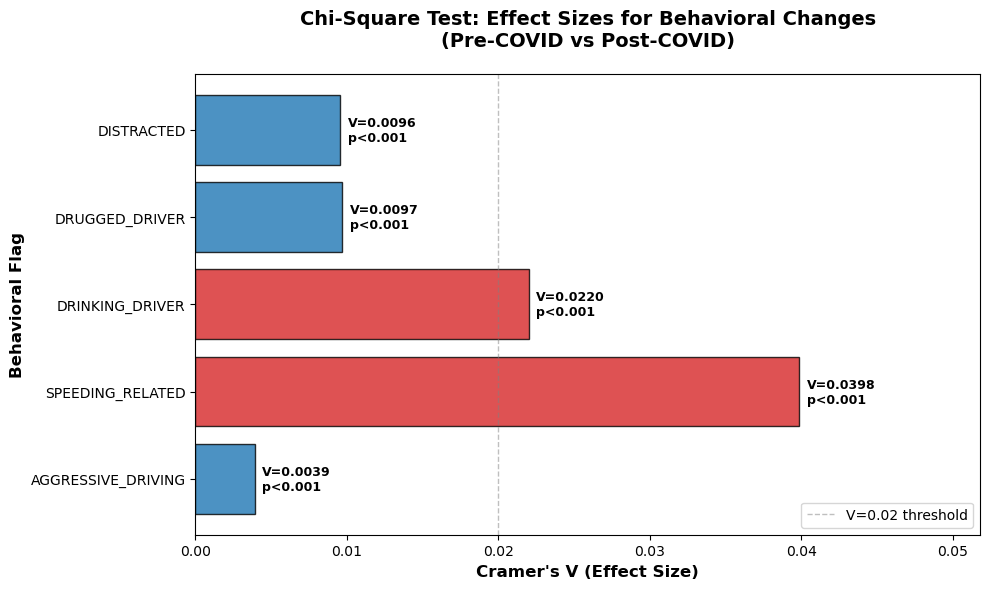

In [115]:
# VISUALIZATION: Effect Size Comparison (Cramer's V)
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#d62728' if v > 0.02 else '#1f77b4' for v in chi_df['V']]
bars = ax.barh(chi_df['Flag'], chi_df['V'], color=colors, alpha=0.8,  edgecolor='black')

ax.set_xlabel("Cramer's V (Effect Size)", fontsize=12, fontweight='bold')
ax.set_ylabel("Behavioral Flag", fontsize=12, fontweight='bold')
ax.set_title("Chi-Square Test: Effect Sizes for Behavioral Changes\n(Pre-COVID vs Post-COVID)", 
             fontsize=14, fontweight='bold', pad=20)

# Add value labels
for i, v in enumerate(chi_df['V']):
    ax.text(v + 0.0005, i, f"V={v:.4f}\np<0.001", 
            va='center', fontsize=9, fontweight='bold')

# Add threshold line
ax.axvline(0.02, color='gray', linestyle='--', linewidth=1, alpha=0.5, label='V=0.02 threshold')
ax.legend(loc='lower right')

ax.set_xlim(0, max(chi_df['V']) * 1.3)
plt.tight_layout()
plt.show()

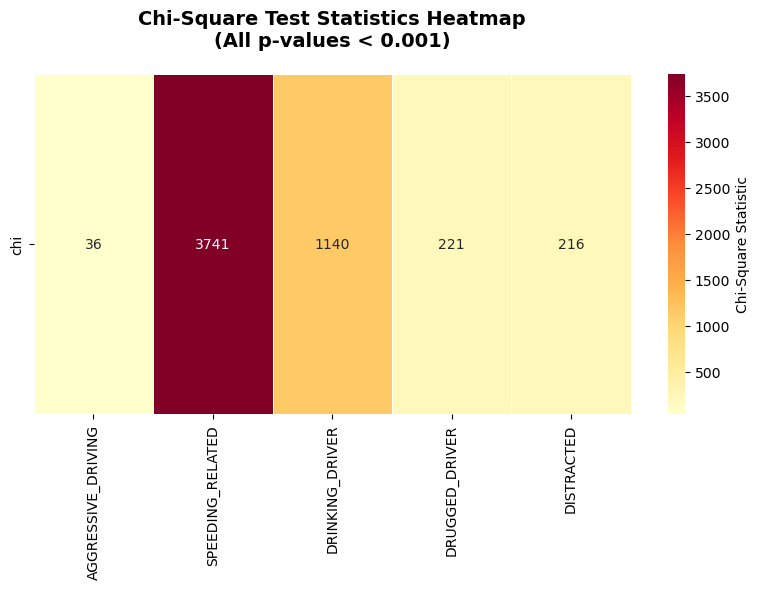

In [116]:
# VISUALIZATION: Chi-Square Statistics Heatmap
fig, ax = plt.subplots(figsize=(8, 6))

chi_matrix = chi_df.set_index('Flag')[['chi']].T
sns.heatmap(chi_matrix, annot=True, fmt='.0f', cmap='YlOrRd', 
            cbar_kws={'label': 'Chi-Square Statistic'}, ax=ax, linewidths=0.5)

ax.set_title("Chi-Square Test Statistics Heatmap\n(All p-values < 0.001)", fontsize=14, fontweight='bold', pad=20)
ax.set_ylabel("")
ax.set_xlabel("")

plt.tight_layout()
plt.show()

In [117]:
'''
2. TWO-SAMPLE PROPORTION TESTS
'''
def two_prop_ztest(count1, n1, count2, n2):
    p1, p2 = count1/n1, count2/n2
    p_pool = (count1+count2)/(n1+n2)
    se = np.sqrt(p_pool*(1-p_pool)*(1/n1+1/n2))
    z = (p1-p2)/se
    return z, 2*(1-stats.norm.cdf(abs(z)))

prop_results = []
t0 = time.time()

for flag in behavioral_flags:
    pre_r, post_r = pre_covid[flag].mean(), post_covid[flag].mean()
    c_pre, n_pre = int(pre_covid[flag].sum()), len(pre_covid)
    c_post, n_post = int(post_covid[flag].sum()), len(post_covid)
    
    z, pval = two_prop_ztest(c_post, n_post, c_pre, n_pre)
    pp_change = (post_r - pre_r) * 100
    se = np.sqrt(post_r*(1-post_r)/n_post + pre_r*(1-pre_r)/n_pre)
    ci_l, ci_u = (post_r-pre_r-1.96*se)*100, (post_r-pre_r+1.96*se)*100
    
    prop_results.append({
        'Flag': flag,
        'Pre%': f"{pre_r*100:.2f}",
        'Post%': f"{post_r*100:.2f}",
        'delta': f"{pp_change:+.2f}",
        'CI': f"[{ci_l:.2f},{ci_u:.2f}]",
        'p': "<0.0001" if pval < 0.0001 else f"{pval:.4f}",
        'Sig': 'Yes' if pval < 0.05 else 'No'
    })

print(f"\nTime: {time.time()-t0:.2f}s")
print(pd.DataFrame(prop_results).to_string(index=False))

# proportion results dataframe
prop_df = pd.DataFrame(prop_results)


Time: 0.01s
              Flag  Pre% Post% delta            CI       p Sig
AGGRESSIVE_DRIVING 56.14 55.65 -0.49 [-0.65,-0.33] <0.0001 Yes
  SPEEDING_RELATED 26.09 21.71 -4.38 [-4.52,-4.25] <0.0001 Yes
   DRINKING_DRIVER  8.88  7.32 -1.56 [-1.65,-1.47] <0.0001 Yes
    DRUGGED_DRIVER  2.58  2.98 +0.39   [0.34,0.45] <0.0001 Yes
        DISTRACTED 10.94 10.18 -0.75 [-0.85,-0.65] <0.0001 Yes


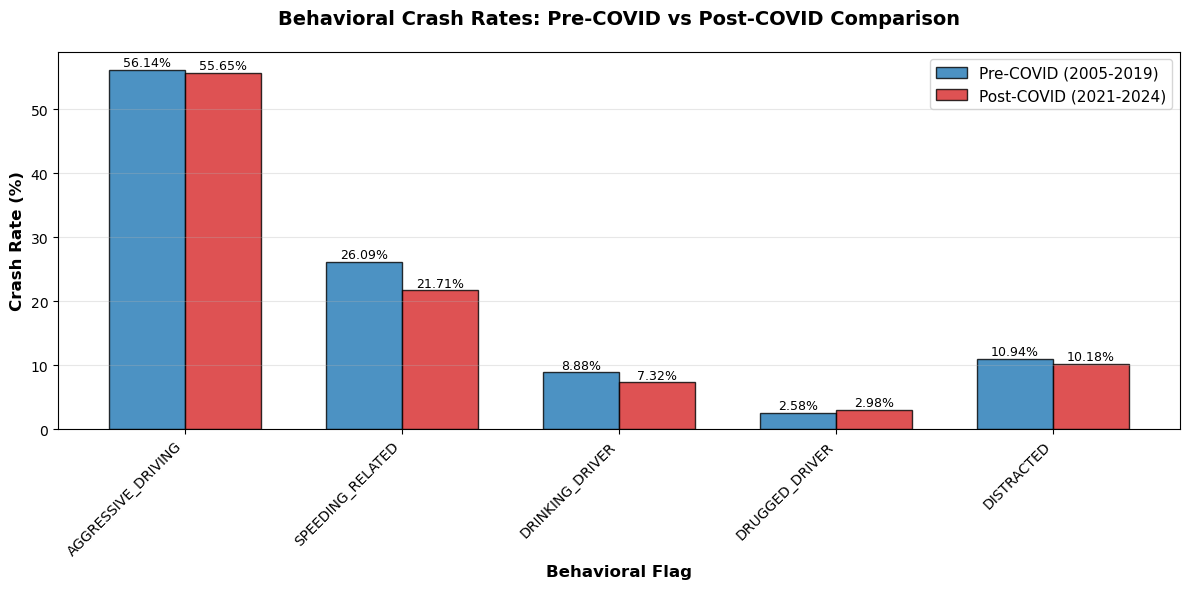

In [118]:
# VISUALIZATION: Before/After Comparison
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(prop_df))
width = 0.35

# Convert string columns to numeric
pre_numeric = pd.to_numeric(prop_df['Pre%'], errors='coerce')
post_numeric = pd.to_numeric(prop_df['Post%'], errors='coerce')

bars1 = ax.bar(x - width/2, pre_numeric, width, 
               label='Pre-COVID (2005-2019)', color='#1f77b4', alpha=0.8, edgecolor='black')
bars2 = ax.bar(x + width/2, post_numeric, width, 
               label='Post-COVID (2021-2024)', color='#d62728', alpha=0.8, edgecolor='black')

ax.set_xlabel('Behavioral Flag', fontsize=12, fontweight='bold')
ax.set_ylabel('Crash Rate (%)', fontsize=12, fontweight='bold')
ax.set_title('Behavioral Crash Rates: Pre-COVID vs Post-COVID Comparison', 
             fontsize=14, fontweight='bold', pad=20)

ax.set_xticks(x)
ax.set_xticklabels(prop_df['Flag'], rotation=45, ha='right')
ax.legend(fontsize=11)

# Add value labels on bars
for i, (pre, post) in enumerate(zip(pre_numeric, post_numeric)):
    ax.text(i - width/2, pre + 0.1, f'{pre:.2f}%', ha='center', va='bottom', fontsize=9)
    ax.text(i + width/2, post + 0.1, f'{post:.2f}%', ha='center', va='bottom', fontsize=9)

ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [119]:
'''
3. LOGISTIC REGRESSION
'''
# Create binary covid indicator (1 = Post-COVID, 0 = Pre-COVID)
df_analysis['post_covid'] = (df_analysis['covid_period'] == 'Post-COVID').astype(int)
df_model = df_analysis.copy()
df_model = pd.get_dummies(df_model, columns=['season', 'weather_simple', 'road_condition_simple'], drop_first=True, dtype=int)

features = ['post_covid'] + [c for c in df_model.columns if any(
    b in c for b in ['season_','weather_simple_','road_condition_simple_']
)] + ['is_weekend','URBAN_RURAL','urban_crash_density',
      'county_risk_score','crashes_per_year_county']

features = [f for f in features if f in df_model.columns and df_model[f].notna().all()]
print(f"Predictors: {len(features)} (1 primary + {len(features)-1} controls)")

log_results = []
t0 = time.time()

for flag in behavioral_flags + ['high_severity']:
    X = sm.add_constant(df_model[features])
    y = df_model[flag]
    
    try:
        model = sm.Logit(y, X).fit(disp=0, maxiter=100)
        coef = model.params['post_covid']
        se = model.bse['post_covid']
        pval = model.pvalues['post_covid']
        or_val = np.exp(coef)
        ci_l, ci_u = np.exp(coef-1.96*se), np.exp(coef+1.96*se)
        
        log_results.append({
            'Outcome': flag,
            'OR': f"{or_val:.3f}",
            'CI': f"[{ci_l:.3f},{ci_u:.3f}]",
            'p': "<0.0001" if pval<0.0001 else f"{pval:.4f}",
            'Sig': 'Yes' if pval<0.05 else 'No',
            'delta': f"{(or_val-1)*100:+.1f}%"
        })
    except Exception as e:
        log_results.append({'Outcome':flag,'OR':'Error','CI':'Error',
                           'p':'Error','Sig':'Error','delta':'Error'})

print(f"\nTime: {time.time()-t0:.1f}s")
print(pd.DataFrame(log_results).to_string(index=False))

# logistic regression results dataframe
log_df = pd.DataFrame(log_results)


Predictors: 9 (1 primary + 8 controls)

Time: 15.5s
           Outcome    OR            CI       p Sig  delta
AGGRESSIVE_DRIVING 0.965 [0.959,0.971] <0.0001 Yes  -3.5%
  SPEEDING_RELATED 0.804 [0.798,0.810] <0.0001 Yes -19.6%
   DRINKING_DRIVER 0.802 [0.792,0.812] <0.0001 Yes -19.8%
    DRUGGED_DRIVER 1.145 [1.123,1.167] <0.0001 Yes +14.5%
        DISTRACTED 0.904 [0.895,0.914] <0.0001 Yes  -9.6%
     high_severity 1.047 [1.012,1.082]  0.0071 Yes  +4.7%


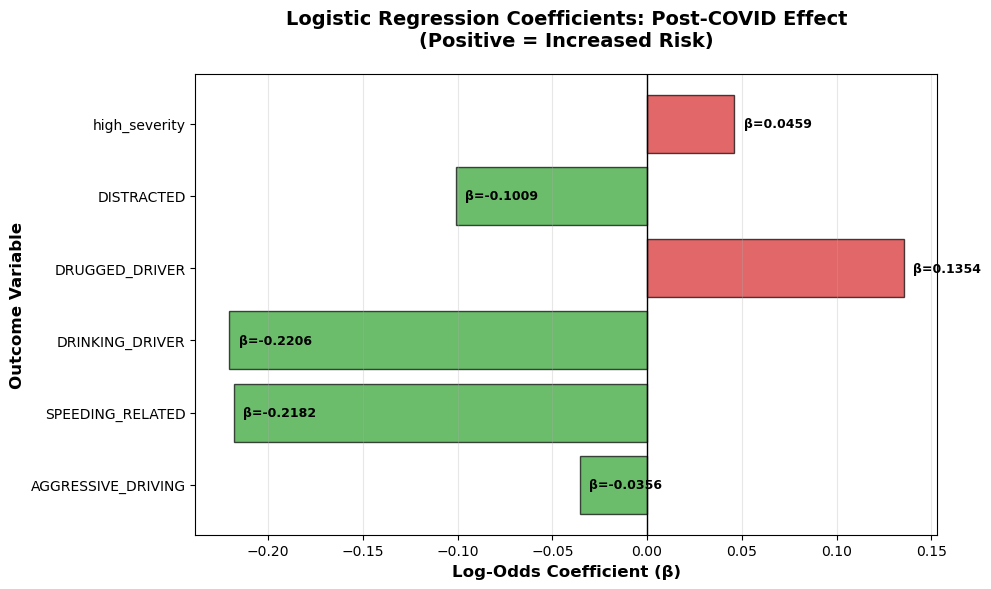

In [120]:
# VISUALIZATION: Coefficient Comparison
# Convert OR to numeric
if 'OR_numeric' not in log_df.columns:
    log_df['OR_numeric'] = pd.to_numeric(log_df['OR'], errors='coerce')
    log_df['p_numeric'] = pd.to_numeric(log_df['p'].replace('<0.0001', '0.0001'), errors='coerce')

# Add Coef column
log_df['Coef'] = np.log(log_df['OR_numeric'])

fig, ax = plt.subplots(figsize=(10, 6))

colors_coef = ['#d62728' if c > 0 else '#2ca02c' for c in log_df['Coef']]
bars = ax.barh(log_df['Outcome'], log_df['Coef'], color=colors_coef, alpha=0.7, edgecolor='black')

ax.set_xlabel('Log-Odds Coefficient (β)', fontsize=12, fontweight='bold')
ax.set_ylabel('Outcome Variable', fontsize=12, fontweight='bold')
ax.set_title('Logistic Regression Coefficients: Post-COVID Effect\n(Positive = Increased Risk)', 
             fontsize=14, fontweight='bold', pad=20)

# Add value labels
for i, (v, p) in enumerate(zip(log_df['Coef'], log_df['p_numeric'])):
    ax.text(v + 0.005, i, f'β={v:.4f}', 
            va='center', fontsize=9, fontweight='bold')

ax.axvline(0, color='black', linestyle='-', linewidth=1)
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()